In [15]:
# importing libraries we are going to need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [16]:
#----------------------------------------------------------------
# Importing Data
#----------------------------------------------------------------

file = open('../files/ch03/adult.data','r')

#----------------------------------------------------------------
# Process data Function
#----------------------------------------------------------------

def chr_int(a):
    if a.isdigit(): return int(a)
    else: return 0
    
data = []
for line in file:
    data1 = line.split(', ')
    if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [17]:
print data[1:2]

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [18]:
df = pd.DataFrame(data)
df.columns = [
    'age', 'type_employer', 'dflwgt', 'education',
    'education_num', 'marital', 'occupation', 'relationship',
    'race', 'sex', 'capital_gain', 'capital_loss', 'hr_per_week',
    'country', 'income'
]

In [19]:
ml = df[(df.sex == "Male")]
ml1 = df[(df.sex == 'Male') & (df.income == '>50K\n')]
fm = df[(df.sex == 'Female')]
fm1 = df[(df.sex == 'Female') & (df.income == '>50K\n')]

In [20]:
print 'The average age of men is: ', ml['age' ]. mean ()
print 'The average age of women is: ', fm['age']. mean ()
print 'The average age of high - income men is: ', ml1['age']. mean ()
print 'The average age of high - income women is: ', fm1['age']. mean ()

The average age of men is:  39.4335474989
The average age of women is:  36.8582304336
The average age of high - income men is:  44.6257880516
The average age of high - income women is:  42.1255301103


In [21]:
ml_mu = ml['age' ]. mean ()
fm_mu = fm['age' ]. mean ()
ml_var = ml['age']. var ()
fm_var = fm['age']. var ()
ml_std = ml['age']. std ()
fm_std = fm['age']. std ()
print 'Statistics of age for men: mu:', ml_mu , 'var: ', ml_var , 'std: ', ml_std
print 'Statistics of age for women : mu:', fm_mu , 'var: ', fm_var , 'std:', fm_std

Statistics of age for men: mu: 39.4335474989 var:  178.773751745 std:  13.3706301925
Statistics of age for women : mu: 36.8582304336 var:  196.383706395 std: 14.0136970994


In [22]:
df2 = df.drop(df.index[(df.income == '>50K\n') &
                       (df['age'] > df['age'].median() + 35) &
                       (df['age'] > df['age'].median() - 15)
                      ])

ml1_age = ml1['age']
fm1_age = fm1['age']

ml2_age = ml1_age.drop(ml1_age.index[
    (ml1_age > df['age'].median() + 35) &
    (ml1_age > df['age'].median() - 15)
])

fm2_age = fm1_age.drop(fm1_age.index[
    (fm1_age > df['age'].median() + 35) &
    (fm1_age > df['age'].median() - 15)
])

In [23]:
#---------------------------------------------------------------
# Skewness Function
#---------------------------------------------------------------

def skewness(x):
    res = 0 
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m) * (i-m) * (i-m)
    res /= (len(x) * s * s * s)
    return res

print " Skewness of the male population = ", skewness ( ml2_age )
print " Skewness of the female population is = ", skewness ( fm2_age )

 Skewness of the male population =  0.266444383843
 Skewness of the female population is =  0.386333524913


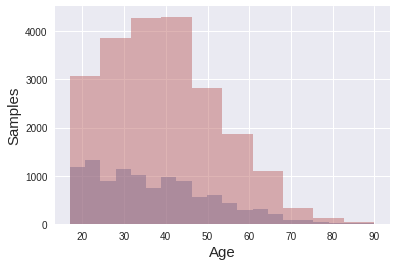

In [24]:
fm_age = fm['age']
ml_age = ml['age']
fm_age.hist( normed = 0, histtype = 'stepfilled' , alpha = .5, bins = 20)
ml_age.hist( normed = 0, histtype = 'stepfilled' , alpha = .5, color = sns.desaturate("indianred", .75) , bins = 10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show();

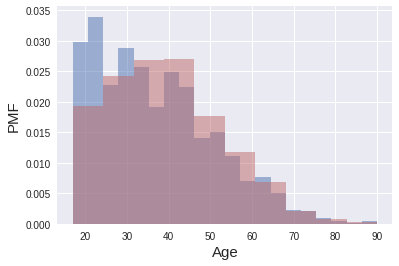

In [25]:
fm_age.hist(normed=1, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
ml_age.hist(normed=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('PMF',fontsize=15)
plt.show()

In [26]:
mu2ml = ml2_age . mean ()
std2ml = ml2_age . std ()
md2ml = ml2_age . median ()
mu2fm = fm2_age . mean ()
std2fm = fm2_age . std ()
md2fm = fm2_age . median ()
print " Men statistics :"
print " Mean :", mu2ml , " Std:", std2ml
print " Median :", md2ml
print " Min:", ml2_age .min () , " Max:", ml2_age . max ()
print " Women statistics :"
print " Mean :", mu2fm , " Std:", std2fm
print " Median :", md2fm
print " Min:", fm2_age . min () , " Max:", fm2_age .max ()

 Men statistics :
 Mean : 44.3179821239  Std: 10.0197498572
 Median : 44.0
 Min: 19  Max: 72
 Women statistics :
 Mean : 41.877028181  Std: 10.0364418073
 Median : 41.0
 Min: 19  Max: 72


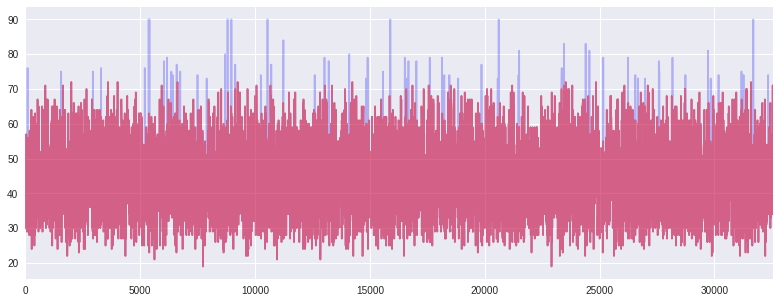

In [27]:
plt.figure(figsize = (13.4, 5))
df.age[(df.income == '>50K\n')].plot(alpha = .25, color = 'blue')
df2.age[(df2.income == '>50K\n')].plot(alpha = .45, color = 'red');

In [28]:
print 'The mean difference with outliers is: % 4.2f.' % ( ml_age . mean () - fm_age . mean ())
print 'The mean difference without outliers is: % 4.2f.' % ( ml2_age . mean () - fm2_age . mean ())

The mean difference with outliers is:  2.58.
The mean difference without outliers is:  2.44.


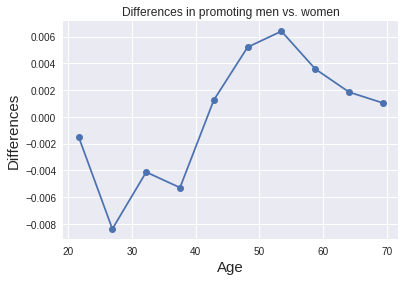

In [29]:
# Lets observe the difference of men and women incomes in cleaned subset
countx, divisionx = np.histogram(ml2_age, normed = True)
county, divisiony = np.histogram(fm2_age, normed = True)

val = [(divisionx[i] + divisionx[i+1])/2 for i in range(len(divisionx) - 1)]
plt.plot(val, countx - county, 'o-')
plt.title('Differences in promoting men vs. women')
plt.xlabel('Age',fontsize=15)
plt.ylabel('Differences',fontsize=15)
plt.show();